<a href="https://colab.research.google.com/github/ERifirms/Api_express_mongodb/blob/main/marketing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals
# Data Quanlity Check
- Q1: Apakah data features yang ada data type nya tidak sesuai
- Q2: Apakah duplicate, missing values atau outliers? bagaimana mengatasi hal-hal tersebut
- Q3: Apakah tersebut distribusi yang tidak masuk akal





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.shape


(2240, 28)

## Quanlion 1
- Apakah data features yang ada data type nya tidak sesuai


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# kesimpulan: Income, Dt_customer

In [ ]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else:
    print(dtype)
    print(df[col].unique())

  print()

ID int64
0 11191

Year_Birth int64
1893 1996

object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/13' '1/5/13'
 '11/21/12' '11/11/12' '9/28/12' '

In [ ]:
df.columns = df.columns.str.replace(' ', '')


In [ ]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [ ]:
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','')

In [ ]:
df['Income'] = df['Income'].astype('float')

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

<Axes: xlabel='Income'>

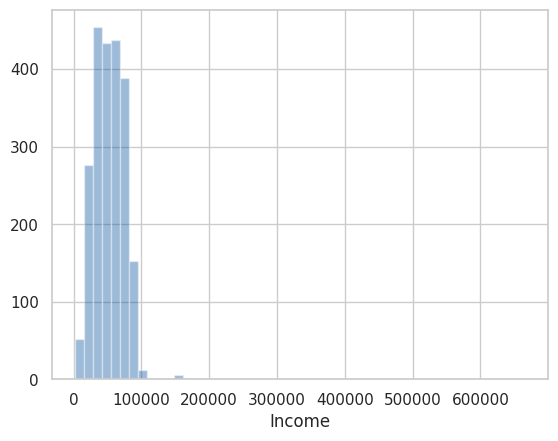

In [ ]:
sns.distplot(df["Income"], kde=False, hist=True)

<Axes: >

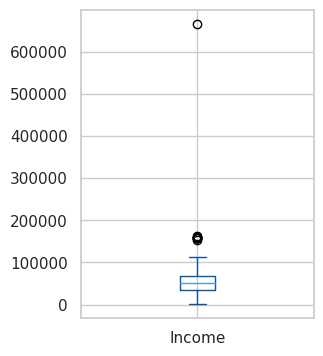

In [ ]:
df['Income'].plot(kind='box', figsize=(3,4))

In [ ]:
df["Income"] = df["Income"].fil